In [81]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import alpaca_trade_api as tradeapi
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [82]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [83]:
# Format date to ISO
begin_time = pd.Timestamp("2012-11-01", tz="UTC").isoformat()
end_time = pd.Timestamp("2022-11-01", tz="UTC").isoformat()

# Define tickers for data
tickers= ['SPY']


# Define timeframe for data to be pulled
timeframe= '1Day'

# Get prices of tickers
stock_data = alpaca.get_bars(tickers, timeframe, start = begin_time, end = end_time).df

# Organize the DataFrame and separate ticker data
SPY = stock_data.drop(columns=['symbol','open','high','low','volume','trade_count', 'vwap'])




In [84]:
# Removing time from dataframe 
SPY.index = pd.to_datetime(SPY.index)
SPY.index = SPY.index.date

In [85]:
# SPY plot
SPY_plot = SPY.hvplot(
    width=1000,
    height=500,
    title= 'SPY Historical Pricing',
    line_color= 'red',
    hover_line_color='green'
)
SPY_plot

:Curve   [index]   (close)

In [86]:
# Read csv file for Gold price, set index as date and round prices
gold = pd.read_csv('./Gold_Historical.csv').set_index('Date').round()
# Convert index Date to year/month/day
gold.index = pd.to_datetime(gold.index)
gold.index = gold.index.date


In [87]:
# Plot gold prices
gold_plot = gold.hvplot(
    width=1000,
    height=500,
    title= 'Gold Historical Pricing',
    line_color= 'yellow',
    hover_line_color='pink',
    rot= 42
)
gold_plot

:Curve   [index]   (Close)

In [88]:
# Combine Gold, SPY plots
combine_plot = gold_plot * SPY_plot
combine_plot

:Overlay
   .Curve.I  :Curve   [index]   (Close)
   .Curve.II :Curve   [index]   (close)

In [89]:
# Aggregate SPY and gold dataframes
SPY_pct = SPY.pct_change()
SPY_agg = (1 + SPY_pct).cumprod()
gold_pct = gold.pct_change()
gold_agg = (1 + gold_pct).cumprod()

In [90]:
# Plot gold aggregation 
gold_plot_agg = gold_agg.hvplot(
    width=1000,
    height=500,
    title= 'Gold Aggregation',
    line_color= 'yellow',
    hover_line_color='pink',
    rot= 42
)
gold_plot_agg

:Curve   [index]   (Close)

In [91]:
# SPY plot aggregation
SPY_plot_agg = SPY_agg.hvplot(
    width=1000,
    height=500,
    title= 'SPY Aggregation',
    line_color= 'red',
    hover_line_color='green'
)
SPY_plot_agg

:Curve   [index]   (close)

Text(0, 0.5, 'Close')

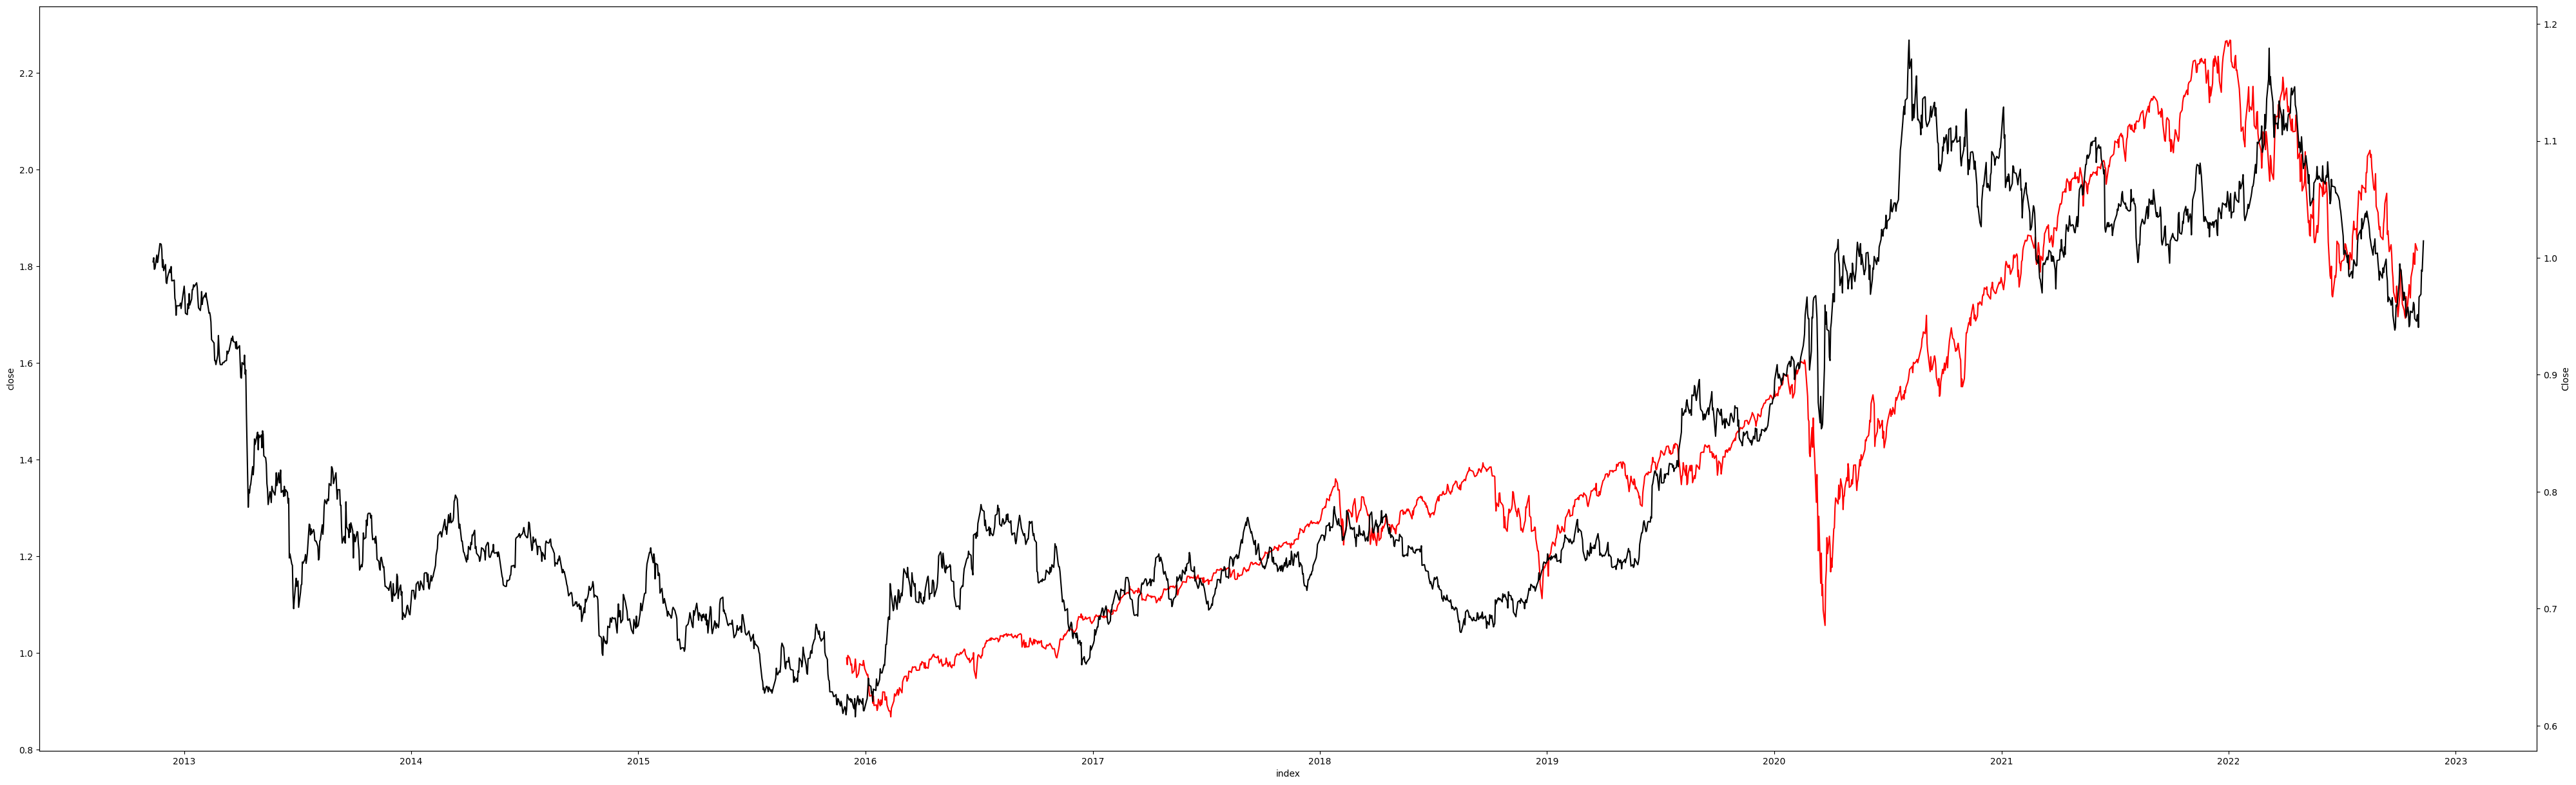

In [103]:
# Combine aggergated plots

fig,ax = plt.subplots(figsize=(50,15))
ax.plot(SPY_agg.index, SPY_agg.close, color='red')
ax.set_xlabel('index')
ax.set_ylabel('close')
ax2 = ax.twinx()
ax2.plot(gold_agg.index, gold_agg.Close, color='black')
ax2.set_ylabel('Close')

In [99]:
# Read Avocado_Historical.csv into dataframe, replace '.' as NaN and drop, change column to float, and set date as index
avo = pd.read_csv('./Avocado_Historical.csv').replace('.', np.nan).dropna().astype({'WPU01110205': 'float'}).set_index('DATE').rename(columns={'WPU01110205': 'avo'})
# Format date
avo.index = pd.to_datetime(avo.index)
avo.index = avo.index.date
# Perform data aggregation
avo_pct = avo.pct_change()
avo_agg = (1 + avo_pct).cumprod()

In [100]:
# Plot avocado data
avo_agg_plot = avo_agg.hvplot(
    width=1000,
    height=500,
    title= 'Avocado Aggregation',
    line_color= 'green',
    hover_line_color='red',
    rot= 42
)
avo_agg_plot

:Curve   [index]   (avo)